In [ ]:
# multicategorical data using decision tree

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("Glass.csv")

In [12]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Type"]=le.fit_transform(df["Type"])

In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [15]:
x=df.drop("Type",axis=1)
y=df["Type"]

In [16]:
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [19]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
dtc_gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3, scoring='neg_log_loss')
dtc_gcv.fit(x,y)

#printing best parameters
print(dtc_gcv.best_params_)
print(dtc_gcv.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.773 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-3.592 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.844 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.179 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-3.466 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.773 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-3.592 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.844 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.179 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

In [20]:
best_tree=dtc_gcv.best_estimator_


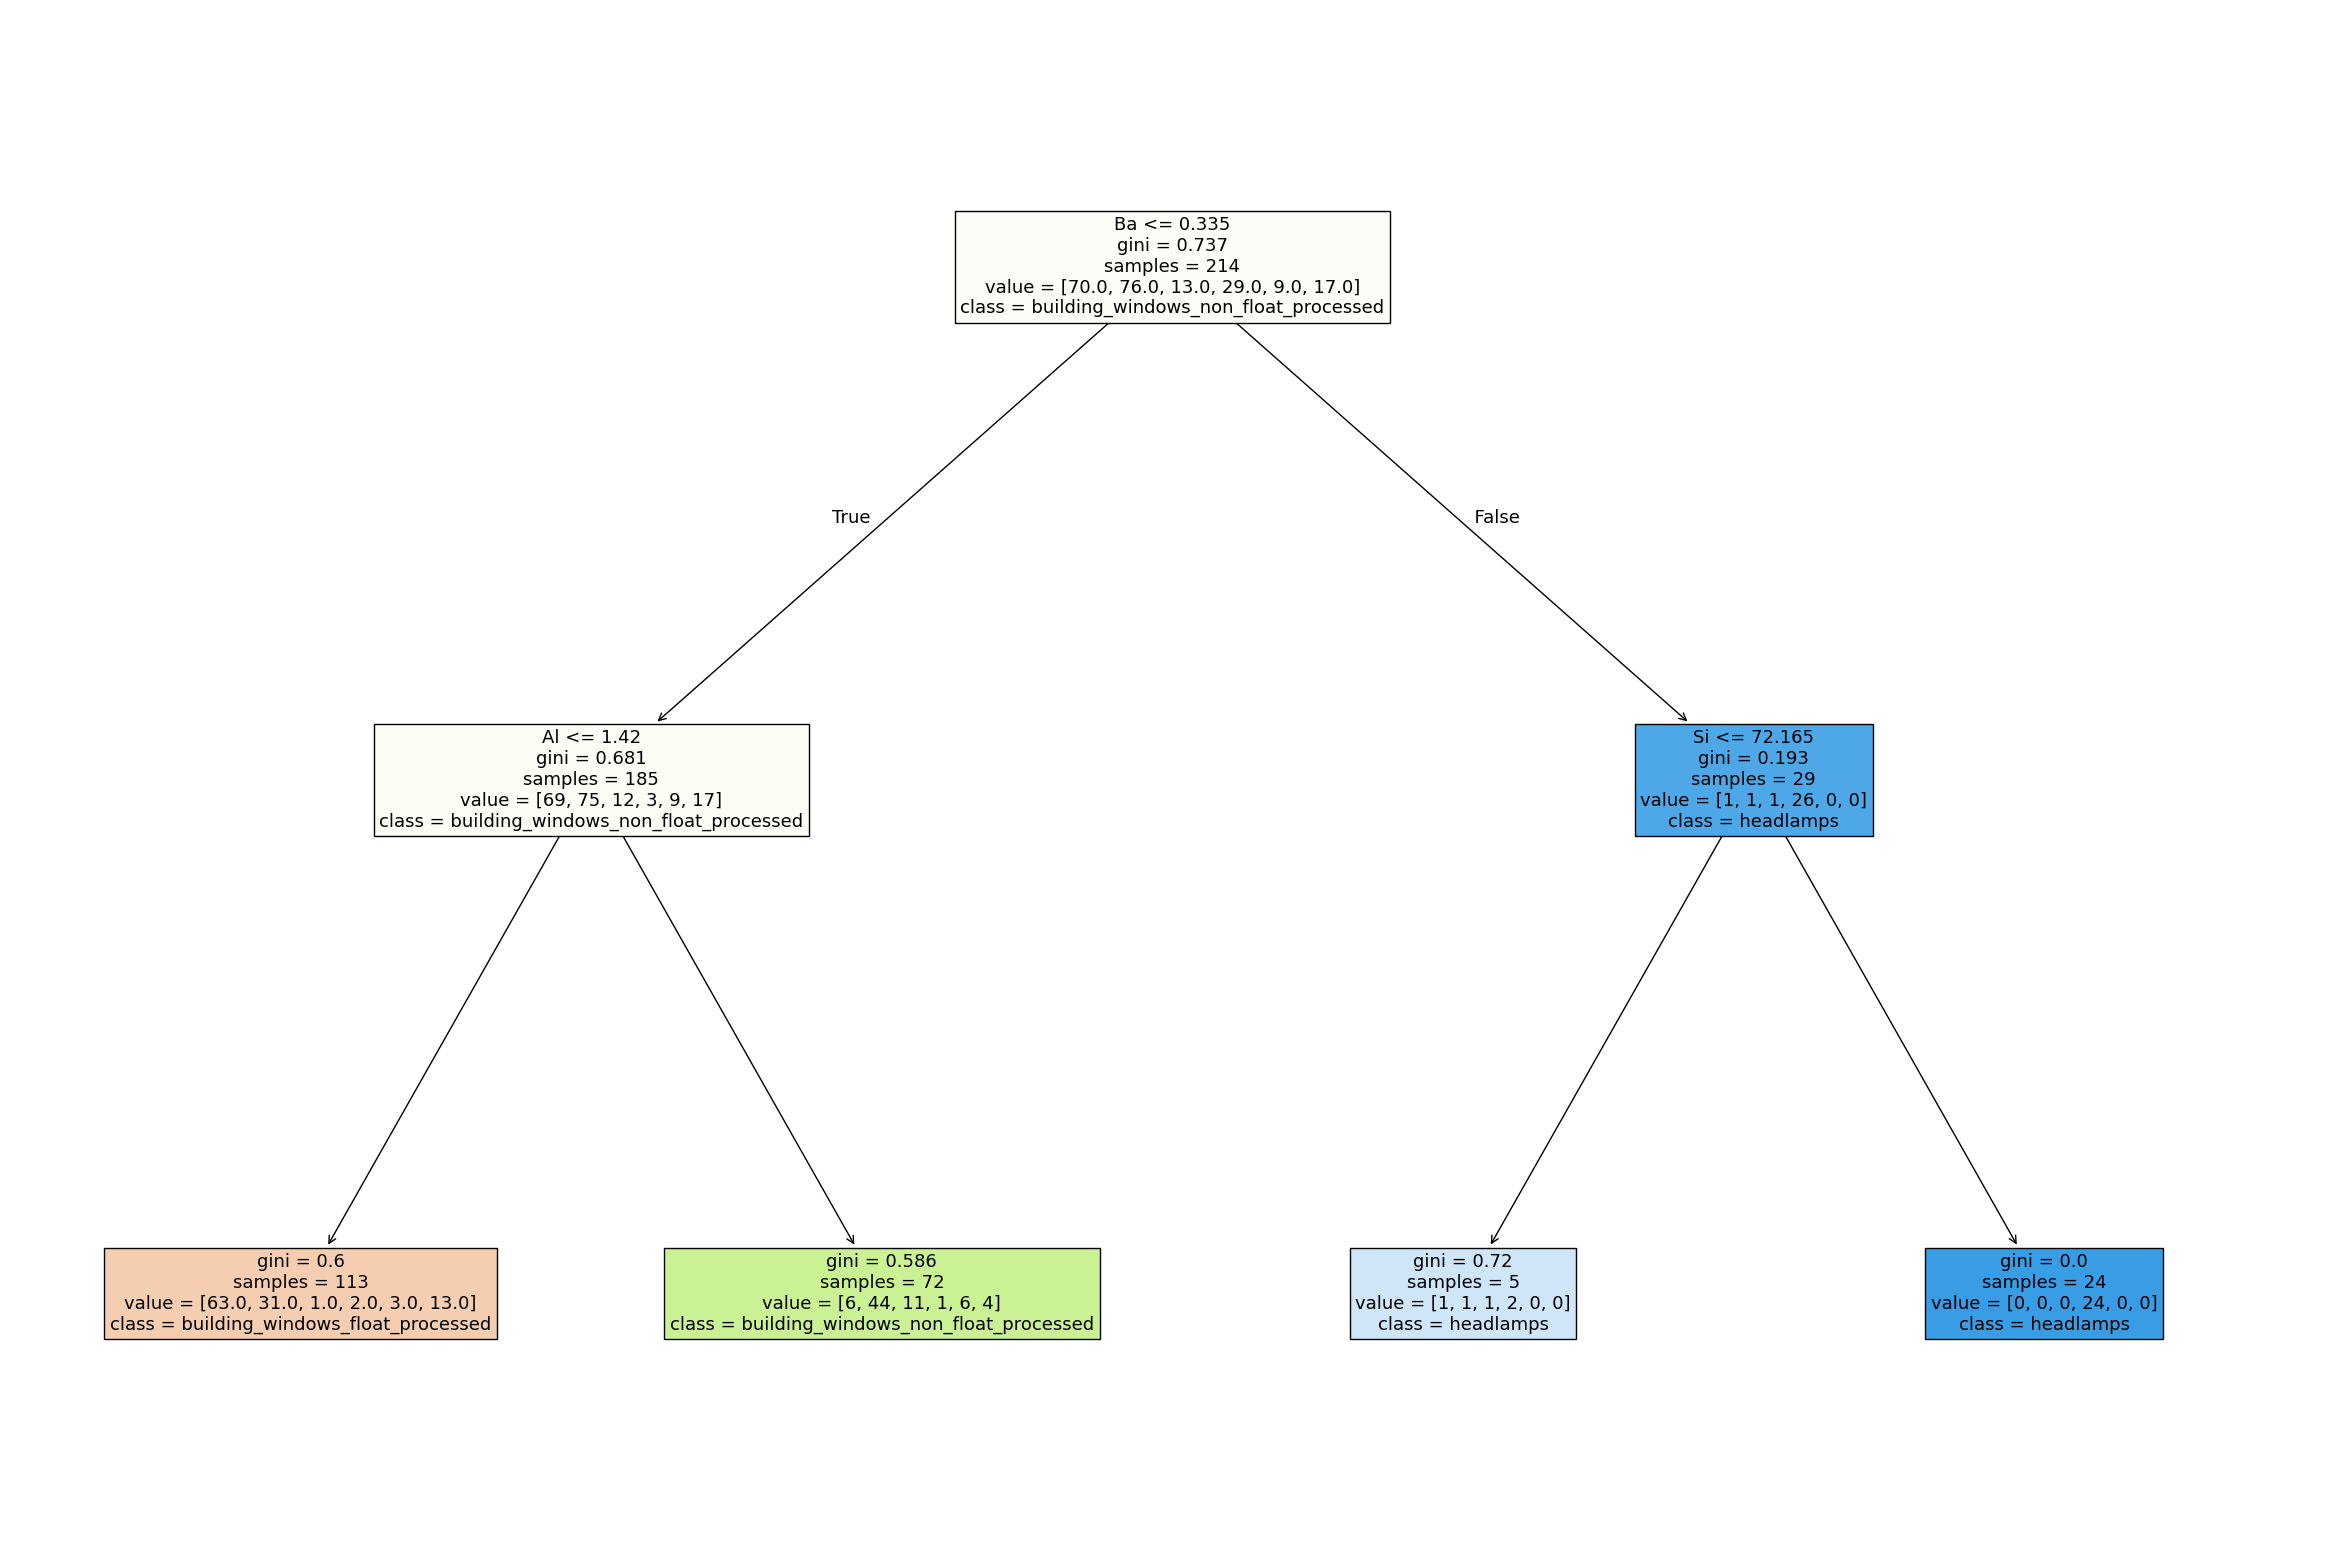

In [22]:
plt.figure(figsize=(30,20))
plot_tree(best_tree,feature_names=x.columns,class_names=list(le.classes_),filled=True,fontsize=13)
plt.show()

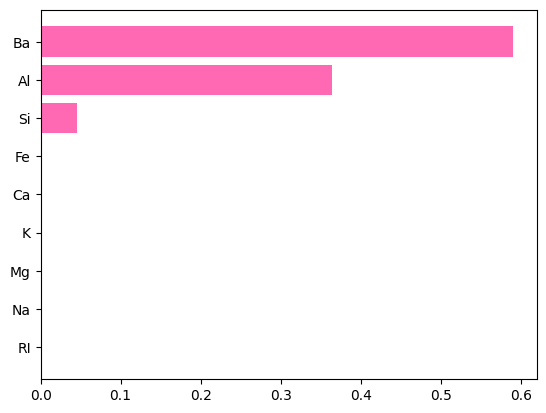

In [23]:
pd_imp=pd.DataFrame({"var":list(x.columns),"imp":best_tree.feature_importances_})
pd_imp.sort_values(by="imp",inplace=True)
plt.barh(pd_imp["var"],pd_imp["imp"],color="hotpink")
plt.show()